In [24]:
%load_ext autoreload
%autoreload 2

from get_data import (get_merged_table, get_bohlin78, get_shull2021)
from plot_fuse_results import plot_results2, plot_results_scatter
from matplotlib import pyplot as plt
from astropy.table import Column
from mpl_toolkits import mplot3d
import numpy as np

plt.ioff()

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 120
%matplotlib widget

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Get the data

### data for Gordon09 extinction curve sightlines

In [25]:
data = get_merged_table()
# add comments for certain stars here
data.add_column(Column(['no'] * len(data), dtype='<U16', name='comment'))
def set_comment(name, s):
    data['comment'][data['Name'] == name] = s

for name in ["HD200775", "HD164906", "HD045314", "HD206773"]:
    set_comment(name, "lo_h_av")

set_comment("HD096675", "hi_h_av")
data['d']

Did not find absolute magnitude for B2Ve
Took 39 distances from Shull+21


/Users/dvandeputte/Projects/FUSE H2/data_analysis/get_data.py:13: RuntimeWarning: overflow encountered in power
  lin = np.power(10.0, log)
/Users/dvandeputte/Projects/FUSE H2/data_analysis/get_data.py:14: RuntimeWarning: overflow encountered in power
  lin_unc = 0.5 * (np.power(10.0, log + log_unc) - np.power(10.0, log - log_unc))
/Users/dvandeputte/Projects/FUSE H2/data_analysis/get_data.py:14: RuntimeWarning: invalid value encountered in subtract
  lin_unc = 0.5 * (np.power(10.0, log + log_unc) - np.power(10.0, log - log_unc))


2.5234807724805757
4.345102241715719
1.5776112696993485
1.8793168168032686
2.8
1.6982436524617461
2.98
1.651961798229015
1.2359474334445109
0.5675446054085471
0.22803420720004186


### data for Gordon09 comparision star sightlines

In [26]:
data_comp = get_merged_table(comp=True)

Took 8 distances from Shull+21


/Users/dvandeputte/Projects/FUSE H2/data_analysis/get_data.py:13: RuntimeWarning: overflow encountered in power
  lin = np.power(10.0, log)
/Users/dvandeputte/Projects/FUSE H2/data_analysis/get_data.py:14: RuntimeWarning: overflow encountered in power
  lin_unc = 0.5 * (np.power(10.0, log + log_unc) - np.power(10.0, log - log_unc))
/Users/dvandeputte/Projects/FUSE H2/data_analysis/get_data.py:14: RuntimeWarning: invalid value encountered in subtract
  lin_unc = 0.5 * (np.power(10.0, log + log_unc) - np.power(10.0, log - log_unc))
/Users/dvandeputte/Projects/FUSE H2/data_analysis/get_data.py:164: RuntimeWarning: invalid value encountered in true_divide
  summed_result[f"nj{lo}"] / gi(lo) * gi(hi) / summed_result[f"nj{hi}"]
/Users/dvandeputte/Projects/FUSE H2/data_analysis/get_data.py:172: RuntimeWarning: invalid value encountered in true_divide
  log2_factor = np.square(np.log(nlo / nhi * gi(hi) / gi(lo)))
/Users/dvandeputte/Projects/FUSE H2/data_analysis/get_data.py:174: RuntimeWarning

### data for Bohlin 78 Copernicus sightlines

In [27]:
data_bohlin78 = get_bohlin78()

In [28]:
print(sorted(data.colnames))

['1_RV', '1_RV_unc', 'A1000', 'A1000_AV', 'A1000_AV_unc', 'A1000_NH', 'A1000_NH_unc', 'A1000_unc', 'A2175', 'A2175_AV', 'A2175_AV_unc', 'A2175_NH', 'A2175_NH_unc', 'A2175_unc', 'AV', 'AV_NH', 'AV_NH_unc', 'AV_d', 'AV_d_unc', 'AV_runc', 'AV_sunc', 'AV_unc', 'C1', 'C1_unc', 'C2', 'C2_unc', 'C3', 'C3_unc', 'C4', 'C4_unc', 'CAV1', 'CAV1_runc', 'CAV1_sunc', 'CAV1_unc', 'CAV2', 'CAV2_runc', 'CAV2_sunc', 'CAV2_unc', 'CAV3', 'CAV3_runc', 'CAV3_sunc', 'CAV3_unc', 'CAV4', 'CAV4_runc', 'CAV4_sunc', 'CAV4_unc', 'Comparison', 'EBV', 'EBV_runc', 'EBV_sunc', 'EBV_unc', 'NH_A1000', 'NH_A1000_unc', 'NH_A2175', 'NH_A2175_unc', 'NH_AV', 'NH_AV_unc', 'NH_EBV', 'NH_EBV_unc', 'Name', 'RV', 'RV_runc', 'RV_sunc', 'RV_unc', 'SpType', 'T01', 'T01_unc', 'V', 'bump_amp', 'bump_amp_unc', 'bump_area', 'bump_area_unc', 'comment', 'd', 'd_gaia', 'd_gaia_unc', 'd_unc', 'denh2', 'denh2_unc', 'denhi', 'denhi_unc', 'denhtot', 'denhtot_unc', 'dphot', 'dphot_unc', 'fh2', 'fh2_unc', 'gamma', 'gamma_runc', 'gamma_sunc', 'gam

# FM90 params versus fraction H2

## Specific wavelength extinction
fh2 vs 1000 (or 1100) shows some structure.
fh2 vs 1300 none at all
fh2 vs 4000 looks like fh2 vs AV (as expected)

------------------------------------------------------------------------
1_RV vs A1000
------------------------------------------------------------------------
VVV-no outlier removal-VVV
+++ MC pearson result +++
raw:  rho = 0.19 +- 0.06 (1.62 sigma0)
 sigmas range = 0.71 - 1.80
avg:  rho = 0.15 +- 0.06 (1.26 sigma0)
 sigmas range = 0.71 - 1.80
median:  rho = 0.15 +- 0.06 (1.26 sigma0)
 sigmas range = 0.71 - 1.80
outlier iteration  0
outlier iteration  1
Solution
m, b_perp: 365.50420279658255 -0.290385647455533
m, b: 365.50420279658255 -106.13757181588069
chi2min: 51.07113008812733 or 0.699604521755169 per DOF
*** FIT RESULT ***
m = 3.66e+02 pm 1.30e+02
b = -1.06e+02 pm 4.06e+01
correlation = -1.00
VVV-auto outlier removal-VVV


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
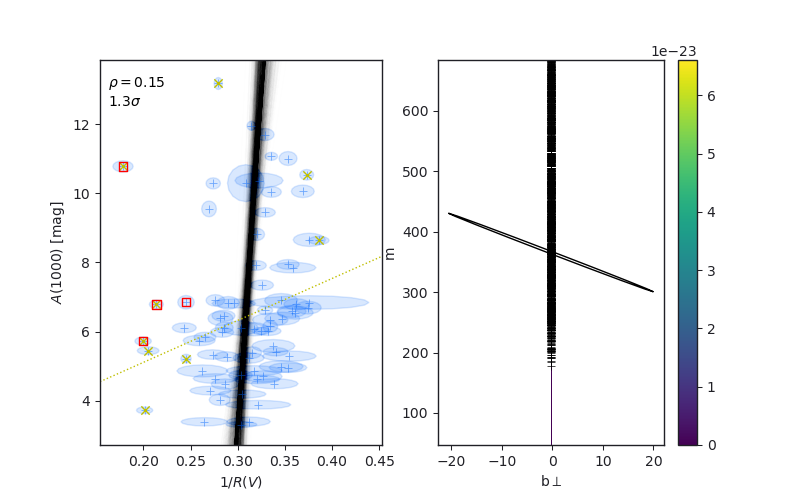

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
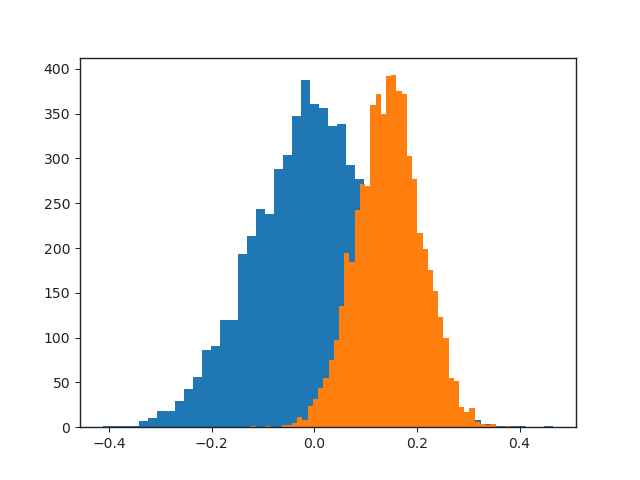

In [6]:
_ = plot_results2(data, '1_RV', 'A1000', mark_comments=['lo_h_av'])

------------------------------------------------------------------------
A1000_AV vs fh2
------------------------------------------------------------------------
VVV-no outlier removal-VVV
+++ MC pearson result +++
raw:  rho = 0.19 +- 0.07 (1.65 sigma0)
 sigmas range = 0.79 - 1.96
avg:  rho = 0.16 +- 0.07 (1.38 sigma0)
 sigmas range = 0.79 - 1.96
median:  rho = 0.16 +- 0.07 (1.38 sigma0)
 sigmas range = 0.79 - 1.96
outlier iteration  0
outlier iteration  1
Solution
m, b_perp: 0.08315394892567099 -0.20263824213124662
m, b: 0.08315394892567099 -0.20333761433709957
chi2min: 52.34856410805313 or 0.717103617918536 per DOF
*** FIT RESULT ***
m = 8.32e-02 pm 5.55e-03
b = -2.03e-01 pm 2.34e-02
correlation = -0.95
VVV-auto outlier removal-VVV


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
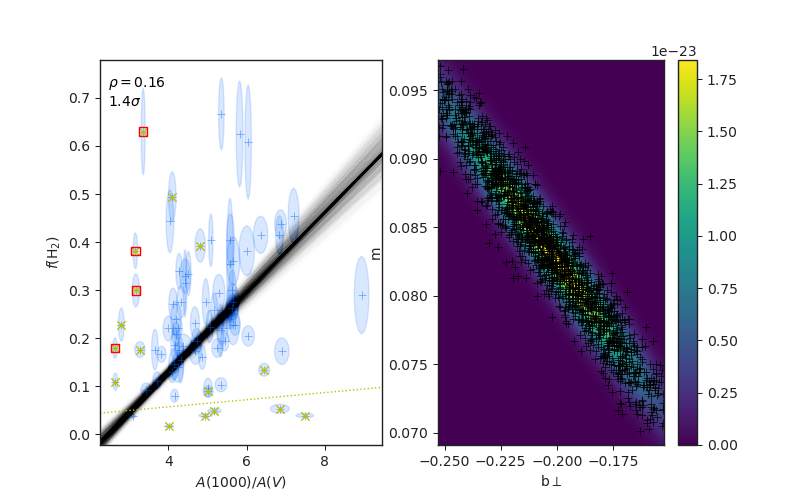

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
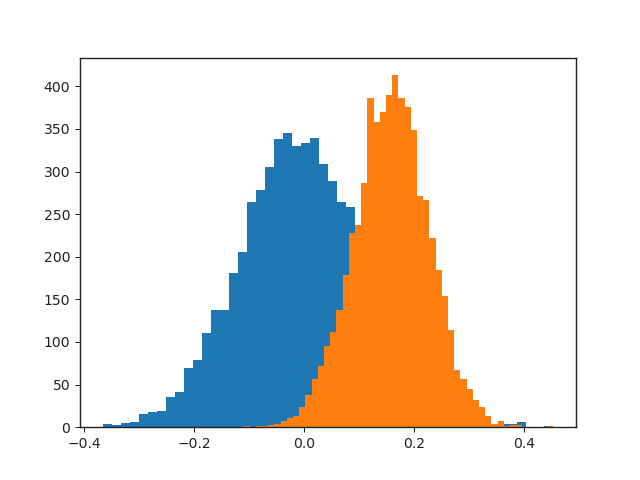

In [7]:
_ = plot_results2(data, "A1000_AV", 'fh2', mark_comments=['lo_h_av'])

------------------------------------------------------------------------
CAV1 vs fh2
------------------------------------------------------------------------
VVV-no outlier removal-VVV
+++ MC pearson result +++
raw:  rho = 0.19 +- 0.05 (1.65 sigma0)
 sigmas range = 0.99 - 1.77
avg:  rho = 0.16 +- 0.05 (1.38 sigma0)
 sigmas range = 0.99 - 1.77
median:  rho = 0.16 +- 0.05 (1.39 sigma0)
 sigmas range = 0.99 - 1.77
outlier iteration  0
outlier iteration  1
Solution
m, b_perp: 0.12337338764416392 0.04809623705385548
m, b: 0.12337338764416392 0.04846089093412831
chi2min: 85.41219767394475 or 1.1700301051225308 per DOF
*** FIT RESULT ***
m = 1.23e-01 pm 1.01e-02
b = 4.85e-02 pm 6.84e-03
correlation = -0.67
VVV-auto outlier removal-VVV


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
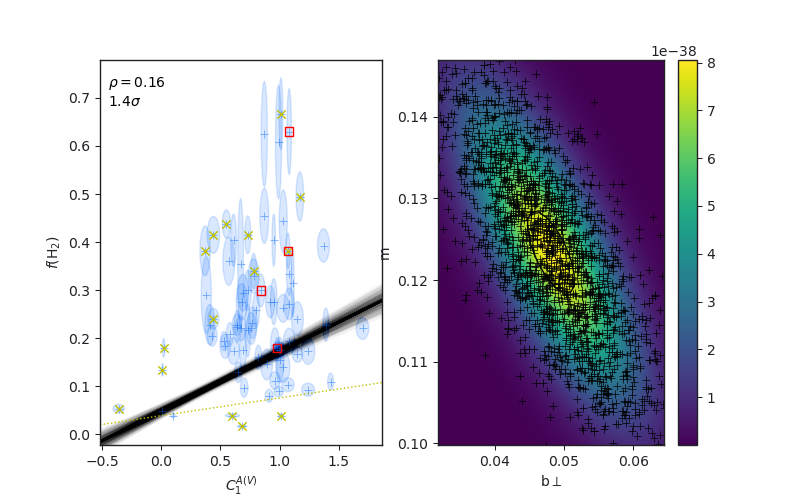

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
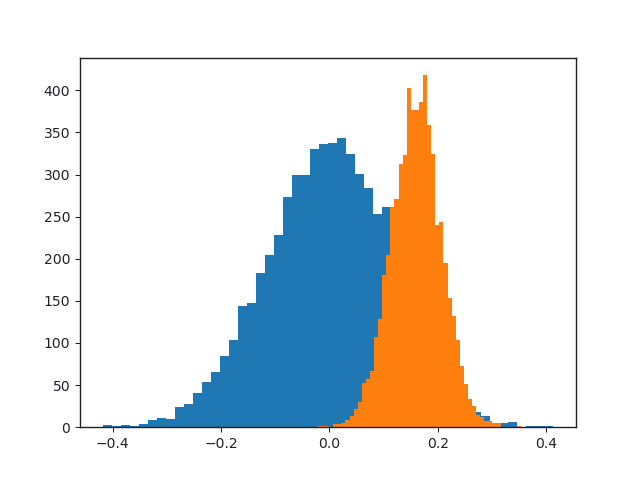

In [8]:
_ = plot_results2(data, 'CAV1', 'fh2', mark_comments=['lo_h_av'])

------------------------------------------------------------------------
CAV2 vs fh2
------------------------------------------------------------------------
VVV-no outlier removal-VVV
+++ MC pearson result +++
raw:  rho = -0.14 +- 0.05 (-1.21 sigma0)
 sigmas range = -1.42 - -0.59
avg:  rho = -0.12 +- 0.05 (-1.01 sigma0)
 sigmas range = -1.42 - -0.59
median:  rho = -0.12 +- 0.05 (-1.02 sigma0)
 sigmas range = -1.42 - -0.59
outlier iteration  0
outlier iteration  1
Solution
m, b_perp: -0.36773760369789266 0.21385290420480244
m, b: -0.36773760369789266 0.2278543179168348
chi2min: 70.88259211880238 or 0.9709944125863339 per DOF
*** FIT RESULT ***
m = -3.68e-01 pm 2.99e-02
b = 2.28e-01 pm 1.14e-02
correlation = -0.88
VVV-auto outlier removal-VVV


KeyboardInterrupt: 

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
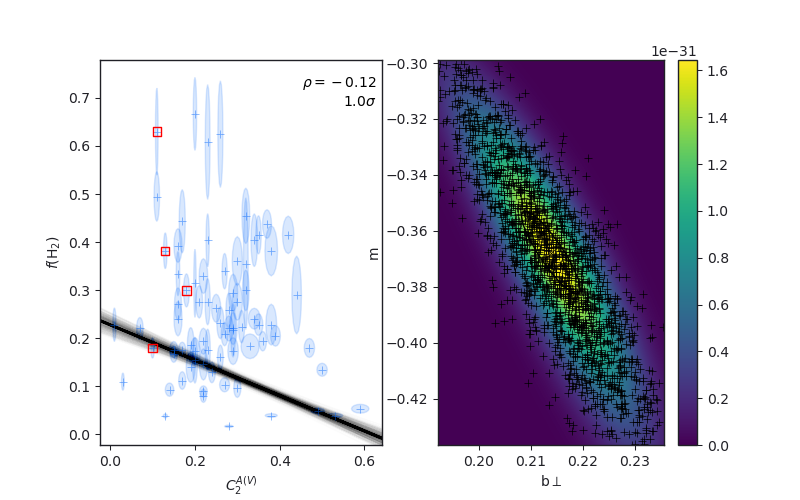

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
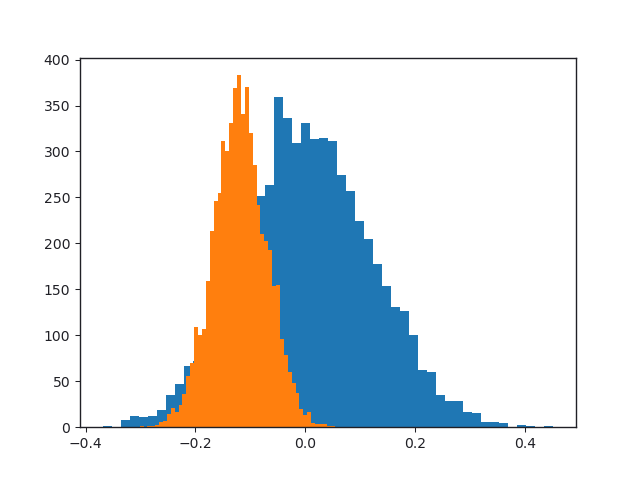

In [9]:
_ = plot_results2(data, 'CAV2', 'fh2', mark_comments=['lo_h_av'])

In [ ]:
_ = plot_results2(data, 'CAV3', 'fh2', ignore_comments=['lo_h_av'])

In [ ]:
_ = plot_results2(data, 'CAV4', 'fh2', ignore_comments=['lo_h_av'])
_ = plot_results2(data[data['CAV4']<0.25], 'CAV4', 'fh2', ignore_comments=['lo_h_av'])

In [ ]:
_ = plot_results2(data, 'x_o', 'fh2', mark_comments=['lo_h_av'])

In [ ]:
_ = plot_results2(data, 'gamma', 'fh2', ignore_comments=['lo_h_av'])

In [ ]:
_ = plot_results2(data, 'bump_area', 'fh2', mark_comments=['lo_h_av'])

# Some FM90 parameters versus Gas to dust

In [ ]:
fig, ax = plt.subplots()
_ = plot_results_scatter(ax, data[data['Name'] != 'HD062542'], 'CAV4', 'NH_AV', mark_comments=['lo_h_av'], ignore_comments=['hi_h_av'])
data['Name', 'CAV4'][data['CAV4'] > .3]

In [ ]:
_ = plot_results2(data,'bump_area', 'NH_AV', ignore_comments=['lo_h_av'])

------------------------------------------------------------------------
CAV3 vs NH_AV
------------------------------------------------------------------------
VVV-no outlier removal-VVV
+++ MC pearson result +++
raw:  rho = 0.34 +- 0.07 (2.92 sigma0)
 sigmas range = 1.87 - 3.03
avg:  rho = 0.29 +- 0.07 (2.44 sigma0)
 sigmas range = 1.87 - 3.03
median:  rho = 0.29 +- 0.07 (2.45 sigma0)
 sigmas range = 1.87 - 3.03
VVV-manual outlier removal-VVV
+++ MC pearson result +++
raw:  rho = 0.19 +- 0.07 (1.63 sigma0)
 sigmas range = 0.61 - 1.84
avg:  rho = 0.14 +- 0.07 (1.23 sigma0)
 sigmas range = 0.61 - 1.84
median:  rho = 0.14 +- 0.07 (1.23 sigma0)
 sigmas range = 0.61 - 1.84


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
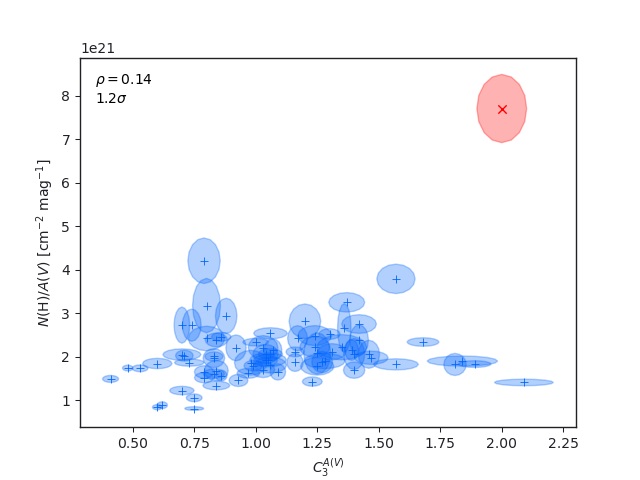

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
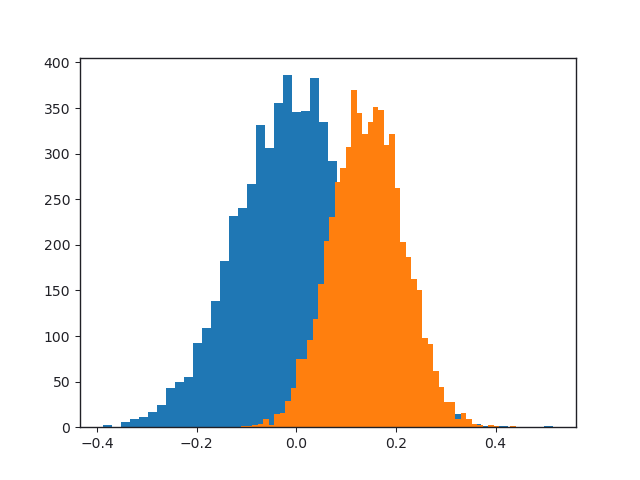

In [13]:
fig, ax = plt.subplots()
_ = plot_results_scatter(ax, data,'CAV3', 'NH_AV', ignore_comments=['hi_h_av'])

In [ ]:
fig, ax = plt.subplots()
_ = plot_results_scatter(ax, data,'nhi', 'NH_AV', ignore_comments=['hi_h_av'])

In [ ]:
fig, ax = plt.subplots()
_ = plot_results_scatter(ax, data,'denhtot', 'NH_AV', ignore_comments=['hi_h_av'])

------------------------------------------------------------------------
AV vs A1000
------------------------------------------------------------------------
VVV-no outlier removal-VVV
+++ MC pearson result +++
raw:  rho = 0.74 +- 0.01 (6.34 sigma0)
 sigmas range = 6.11 - 6.36
avg:  rho = 0.73 +- 0.01 (6.23 sigma0)
 sigmas range = 6.11 - 6.36
median:  rho = 0.73 +- 0.01 (6.24 sigma0)
 sigmas range = 6.11 - 6.36
VVV-manual outlier removal-VVV
+++ MC pearson result +++
raw:  rho = 0.74 +- 0.01 (6.36 sigma0)
 sigmas range = 6.13 - 6.37
avg:  rho = 0.73 +- 0.01 (6.25 sigma0)
 sigmas range = 6.13 - 6.37
median:  rho = 0.73 +- 0.01 (6.25 sigma0)
 sigmas range = 6.13 - 6.37
outlier iteration  0
outlier iteration  1
Solution
m, b_perp: 4.217748584078815 0.13712544995317613
m, b: 4.217748584078815 0.5943941927560115
chi2min: 71.52549940950158 or 0.9798013617739942 per DOF
*** FIT RESULT ***
m = 4.22e+00 pm 1.16e-01
b = 5.94e-01 pm 1.48e-01
correlation = -0.93
VVV-auto outlier removal-VVV


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
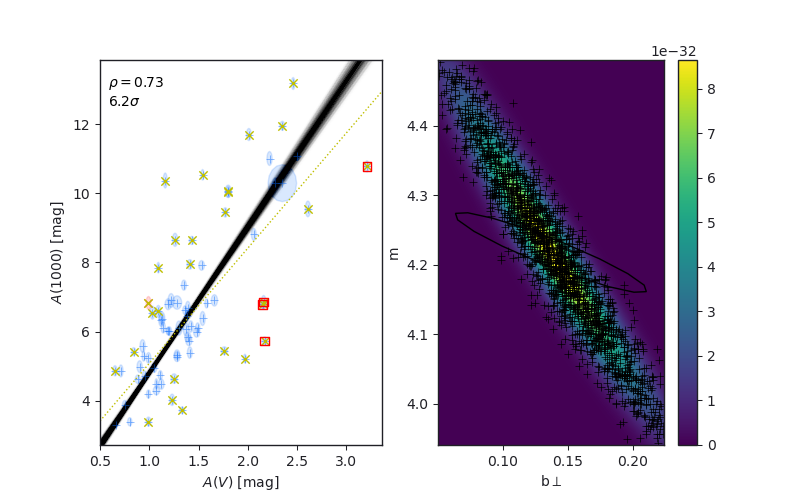

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
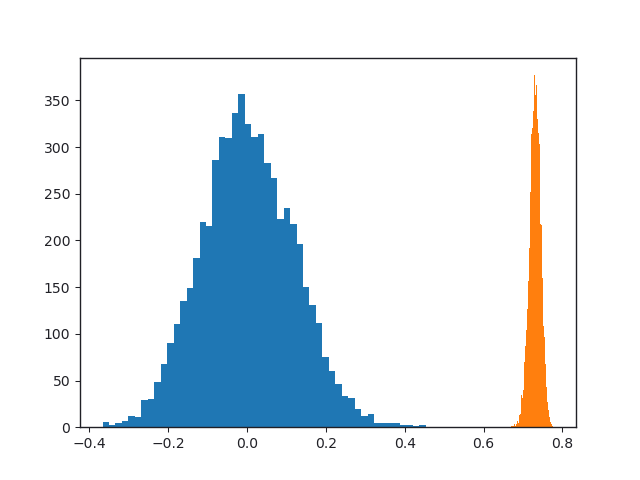

In [15]:
_ = plot_results2(data, 'AV', 'A1000', ignore_comments=['hi_h_av'], mark_comments=['lo_h_av'])

------------------------------------------------------------------------
A1000_AV vs AV_NH
------------------------------------------------------------------------
VVV-no outlier removal-VVV
+++ MC pearson result +++
raw:  rho = -0.46 +- 0.05 (-3.98 sigma0)
 sigmas range = -3.82 - -2.96
avg:  rho = -0.39 +- 0.05 (-3.39 sigma0)
 sigmas range = -3.82 - -2.96
median:  rho = -0.40 +- 0.05 (-3.41 sigma0)
 sigmas range = -3.82 - -2.96
VVV-manual outlier removal-VVV
+++ MC pearson result +++
raw:  rho = -0.44 +- 0.05 (-3.75 sigma0)
 sigmas range = -3.61 - -2.72
avg:  rho = -0.37 +- 0.05 (-3.16 sigma0)
 sigmas range = -3.61 - -2.72
median:  rho = -0.37 +- 0.05 (-3.18 sigma0)
 sigmas range = -3.61 - -2.72
outlier iteration  0
outlier iteration  1
Solution
m, b_perp: -4.0111011871822986e-23 6.852741090001437e-22
m, b: -4.0111011871822986e-23 6.852741090001437e-22
chi2min: 51.135254334291325 or 0.7004829360861825 per DOF
*** FIT RESULT ***
m = -4.01e-23 pm 6.16e-24
b = 6.85e-22 pm 3.19e-23
correl

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
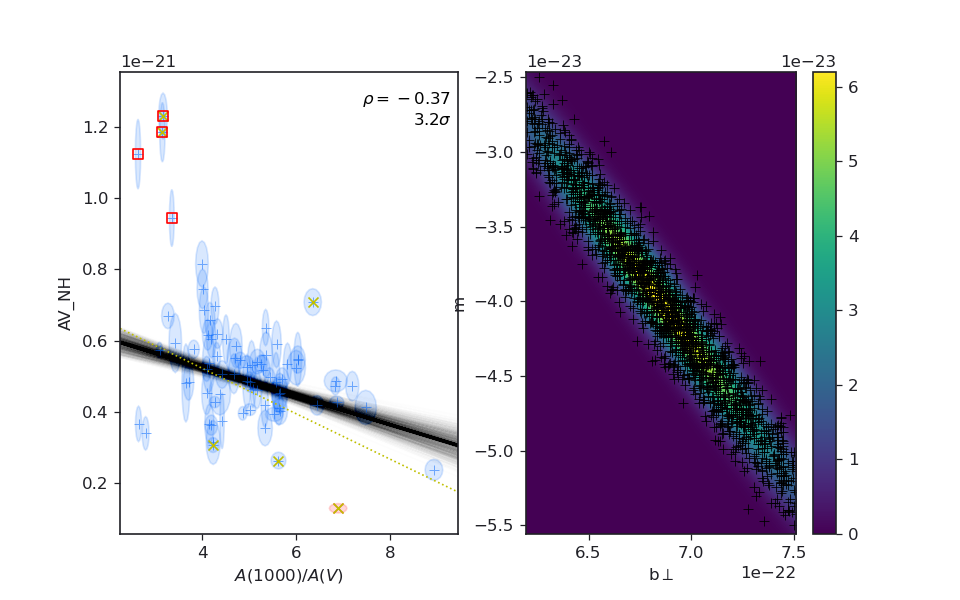

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
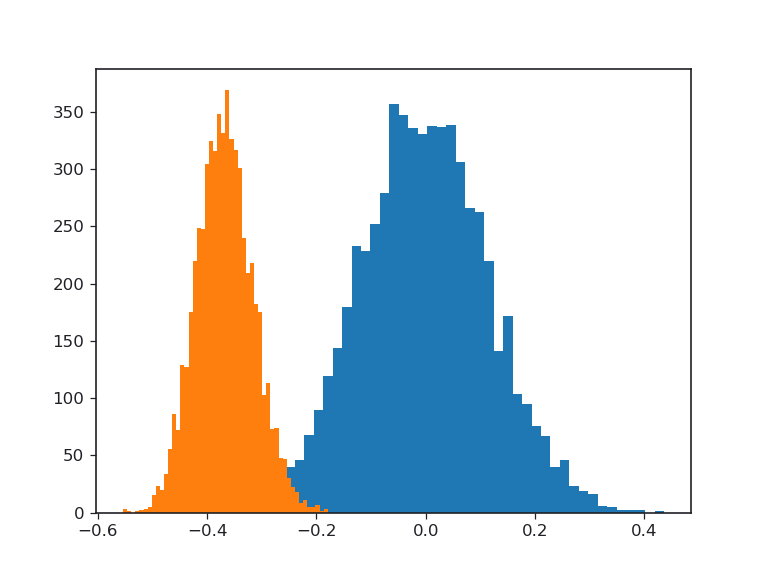

In [29]:
_ = plot_results2(data, 'A1000_AV', 'AV_NH', ignore_comments=['hi_h_av'], mark_comments=['lo_h_av'])

------------------------------------------------------------------------
A1000_NH vs AV_NH
------------------------------------------------------------------------
VVV-no outlier removal-VVV
+++ MC pearson result +++
raw:  rho = 0.66 +- 0.07 (5.61 sigma0)
 sigmas range = 3.35 - 4.59
avg:  rho = 0.46 +- 0.07 (3.96 sigma0)
 sigmas range = 3.35 - 4.59
median:  rho = 0.47 +- 0.07 (3.98 sigma0)
 sigmas range = 3.35 - 4.59
VVV-manual outlier removal-VVV
+++ MC pearson result +++
raw:  rho = 0.63 +- 0.08 (5.46 sigma0)
 sigmas range = 3.12 - 4.47
avg:  rho = 0.44 +- 0.08 (3.79 sigma0)
 sigmas range = 3.12 - 4.47
median:  rho = 0.44 +- 0.08 (3.80 sigma0)
 sigmas range = 3.12 - 4.47
outlier iteration  0
outlier iteration  1
Solution
m, b_perp: 0.23614350007099977 -6.038019146665669e-23
m, b: 0.23614350007099977 -6.204086717441137e-23
chi2min: 33.899784388152824 or 0.464380608056888 per DOF
*** FIT RESULT ***
m = 2.36e-01 pm 1.92e-02
b = -6.20e-23 pm 4.24e-23
correlation = -0.95
VVV-auto outlier 

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
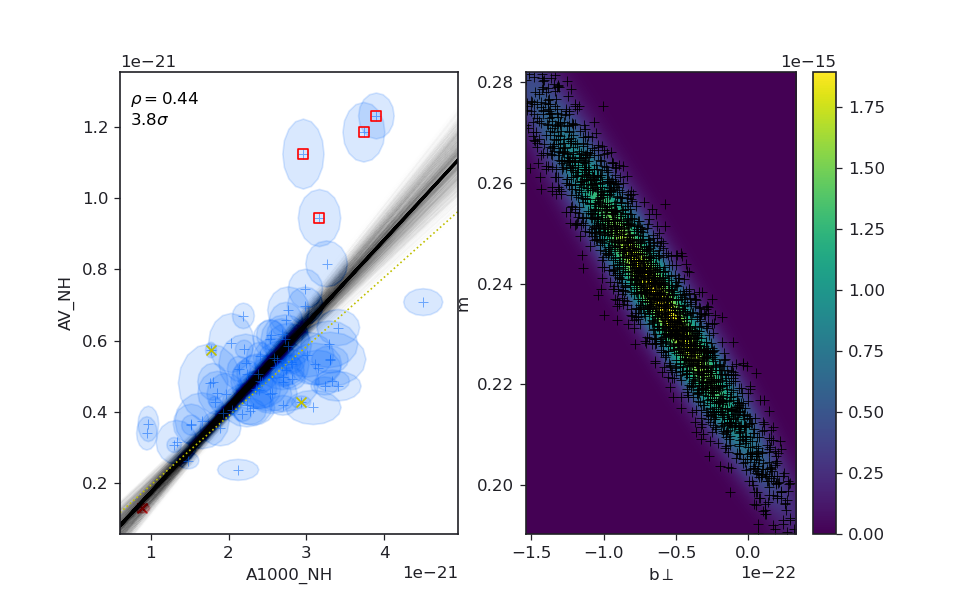

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
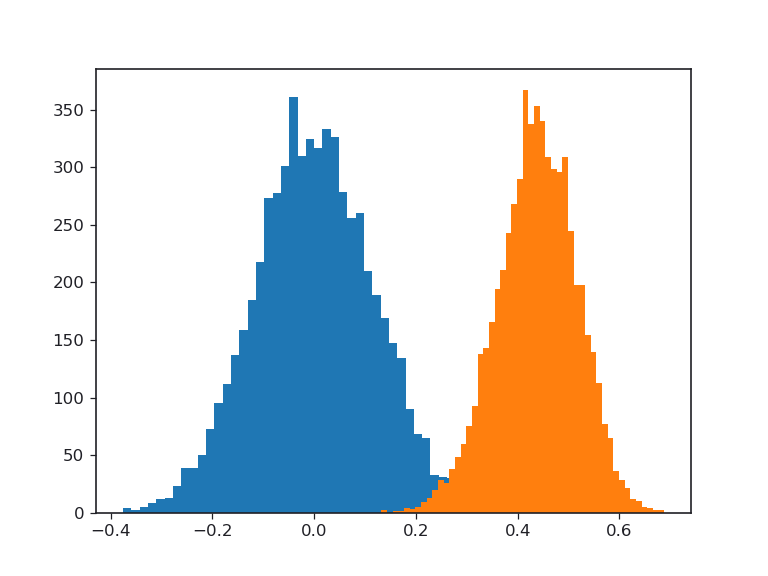

In [30]:
_ = plot_results2(data, 'A1000_NH', 'AV_NH', ignore_comments=['hi_h_av'], mark_comments=['lo_h_av'])

------------------------------------------------------------------------
A1000_AV vs A1000_NH
------------------------------------------------------------------------
VVV-no outlier removal-VVV
+++ MC pearson result +++
raw:  rho = 0.28 +- 0.07 (2.44 sigma0)
 sigmas range = 1.34 - 2.51
avg:  rho = 0.22 +- 0.07 (1.93 sigma0)
 sigmas range = 1.34 - 2.51
median:  rho = 0.23 +- 0.07 (1.93 sigma0)
 sigmas range = 1.34 - 2.51
VVV-manual outlier removal-VVV
+++ MC pearson result +++
raw:  rho = 0.36 +- 0.07 (3.04 sigma0)
 sigmas range = 1.79 - 2.99
avg:  rho = 0.28 +- 0.07 (2.39 sigma0)
 sigmas range = 1.79 - 2.99
median:  rho = 0.28 +- 0.07 (2.40 sigma0)
 sigmas range = 1.79 - 2.99
outlier iteration  0
outlier iteration  1
Solution
m, b_perp: 3.4820311032106176e-22 6.546486776567362e-22
m, b: 3.4820311032106176e-22 6.546486776567362e-22
chi2min: 48.38592627623839 or 0.6628209078936766 per DOF
*** FIT RESULT ***
m = 3.48e-22 pm 3.68e-23
b = 6.55e-22 pm 1.74e-22
correlation = -0.96
VVV-auto ou

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
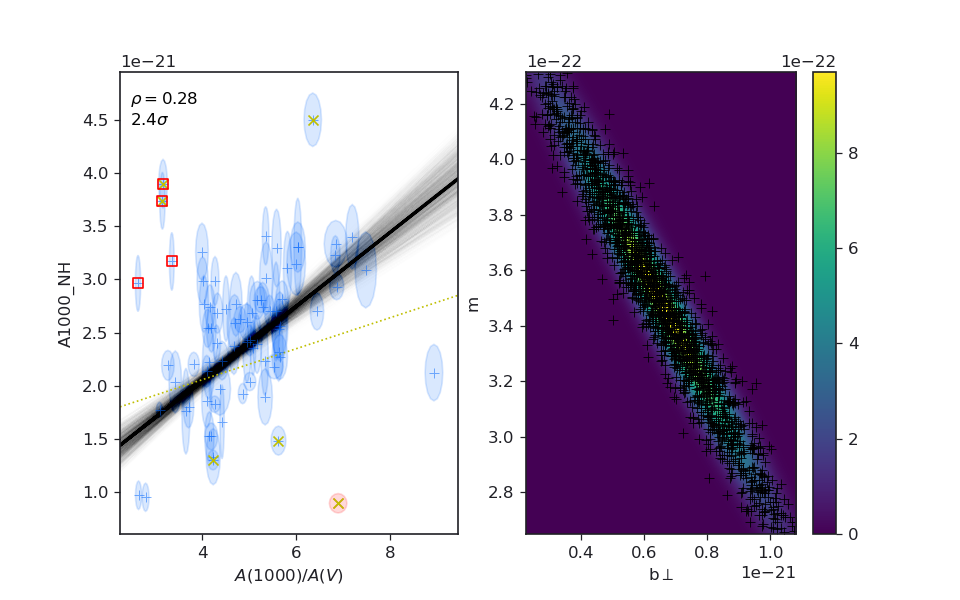

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
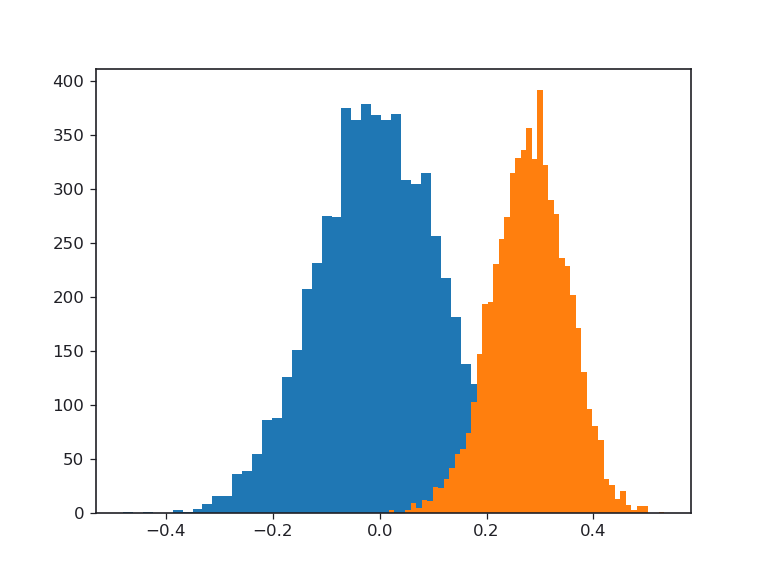

In [31]:
_ = plot_results2(data, 'A1000_AV', 'A1000_NH', ignore_comments=['hi_h_av'], mark_comments=['lo_h_av'])

------------------------------------------------------------------------
A1000_AV vs AV_NH
------------------------------------------------------------------------
VVV-no outlier removal-VVV
+++ MC pearson result +++
raw:  rho = -0.46 +- 0.05 (-4.00 sigma0)
 sigmas range = -3.83 - -2.98
avg:  rho = -0.39 +- 0.05 (-3.40 sigma0)
 sigmas range = -3.83 - -2.98
median:  rho = -0.40 +- 0.05 (-3.41 sigma0)
 sigmas range = -3.83 - -2.98
VVV-manual outlier removal-VVV
+++ MC pearson result +++
raw:  rho = -0.44 +- 0.05 (-3.67 sigma0)
 sigmas range = -3.54 - -2.65
avg:  rho = -0.37 +- 0.05 (-3.10 sigma0)
 sigmas range = -3.54 - -2.65
median:  rho = -0.37 +- 0.05 (-3.10 sigma0)
 sigmas range = -3.54 - -2.65
outlier iteration  0
outlier iteration  1
Solution
m, b_perp: -4.0111011871822986e-23 6.852741090001437e-22
m, b: -4.0111011871822986e-23 6.852741090001437e-22
chi2min: 51.135254334291325 or 0.7004829360861825 per DOF
*** FIT RESULT ***
m = -4.01e-23 pm 5.96e-24
b = 6.85e-22 pm 3.12e-23
correl

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
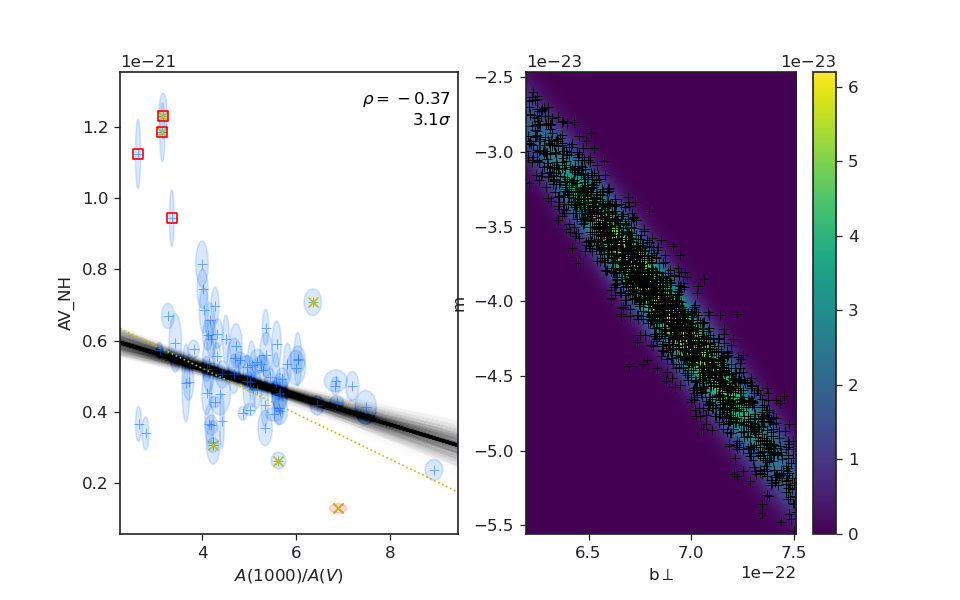

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
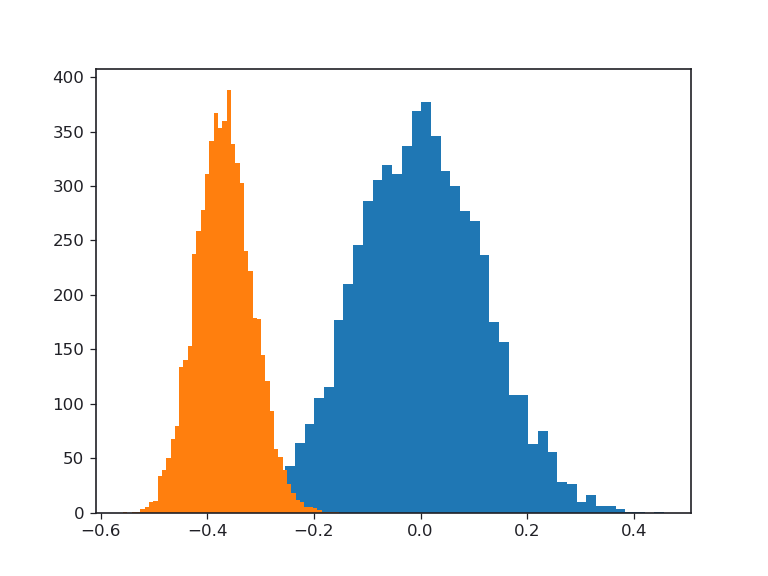

In [32]:
_ = plot_results2(data, 'A1000_AV', 'AV_NH', ignore_comments=['hi_h_av'], mark_comments=['lo_h_av'])

# FM90 parameters in native form (E(lambda - V)/E(B-V)) versus R(V)

In [ ]:
_ = plot_results2(data, '1_RV', 'C2')

In [ ]:
_ = plot_results2(data, '1_RV', 'C3')

In [ ]:
_ = plot_results2(data, '1_RV', 'C4')

In [ ]:
_ = plot_results2(data, '1_RV', 'gamma')

In [ ]:
_ = plot_results2(data, '1_RV', 'x_o')